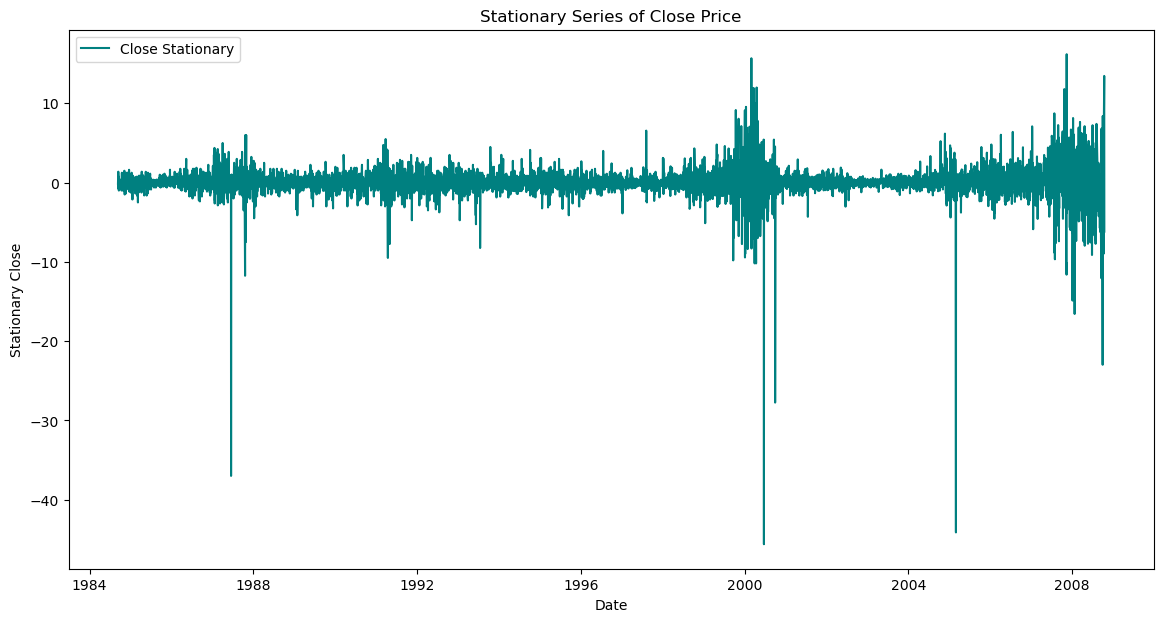

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
# Load the dataset
data = pd.read_csv('largeAAPL.csv')
# Sorting the data by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)

# Checking for missing values
missing_values = data.isnull().sum()

# Displaying the updated DataFrame and missing values
updated_head = data.head()
missing_values, updated_head

data['Close'] = data['Close'].diff().dropna()
# Visualizing the stationary series
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label='Close Stationary', color='teal')
plt.title('Stationary Series of Close Price')
plt.xlabel('Date')
plt.ylabel('Stationary Close')
plt.legend()
plt.show()

LSTM(
  (lstm): LSTM(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)
Epoch [0/100], Loss: 0.6158
Epoch [10/100], Loss: 0.3269
Epoch [20/100], Loss: 0.1162
Epoch [30/100], Loss: 0.0844
Epoch [40/100], Loss: 0.0625
Epoch [50/100], Loss: 0.0431
Epoch [60/100], Loss: 0.0263
Epoch [70/100], Loss: 0.0142
Epoch [80/100], Loss: 0.0057
Epoch [90/100], Loss: 0.0034


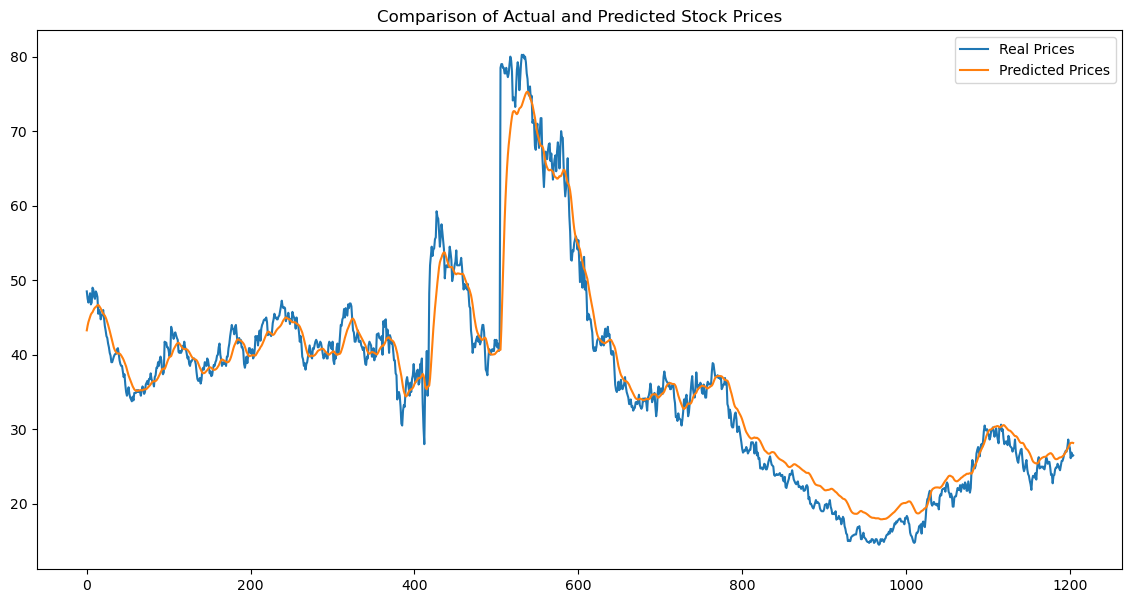

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Read data from file
file_path = 'largeAAPL.csv'
stock_data = pd.read_csv(file_path)

# Preprocess the data
value_range = (-1, 1)
scaler = MinMaxScaler(feature_range=value_range)
close_prices = stock_data['Close'].values.reshape(-1, 1)
scaled_data = scaler.fit_transform(close_prices)

# Function to create data sequences
def generate_sequences(input_data, seq_length):
    sequences, targets = [], []
    for i in range(len(input_data) - seq_length):
        seq = input_data[i:i + seq_length]
        target = input_data[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

seq_length = 60
x, y = generate_sequences(scaled_data, seq_length)

# Splitting dataset
split_ratio = 0.8
split_index = int(len(y) * split_ratio)
x_train, y_train = x[:split_index], y[:split_index]
x_test, y_test = x[split_index:], y[split_index:]

# Convert data to tensors
x_train, y_train = torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
x_test, y_test = torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# LSTM model definition
class LSTM(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=100, layer_num=1):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_num = layer_num
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_num, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, sequence):
        h0 = torch.zeros(self.layer_num, sequence.size(0), self.hidden_dim).to(sequence.device)
        c0 = torch.zeros(self.layer_num, sequence.size(0), self.hidden_dim).to(sequence.device)
        lstm_out, _ = self.lstm(sequence, (h0, c0))
        pred = self.fc(lstm_out[:, -1, :])
        return pred

# Model instantiation and setup
lstm_model = LSTM()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
print(lstm_model)
# Model training
epochs = 100
for epoch in range(epochs):
    lstm_model.train()
    optimizer.zero_grad()
    predictions = lstm_model(x_train)
    loss = loss_fn(predictions, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

# Prediction
lstm_model.eval()
predicted_prices = lstm_model(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices.detach().numpy())
actual_prices = scaler.inverse_transform(y_test.detach().numpy())

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Real Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Comparison of Actual and Predicted Stock Prices')
plt.legend()
plt.show()


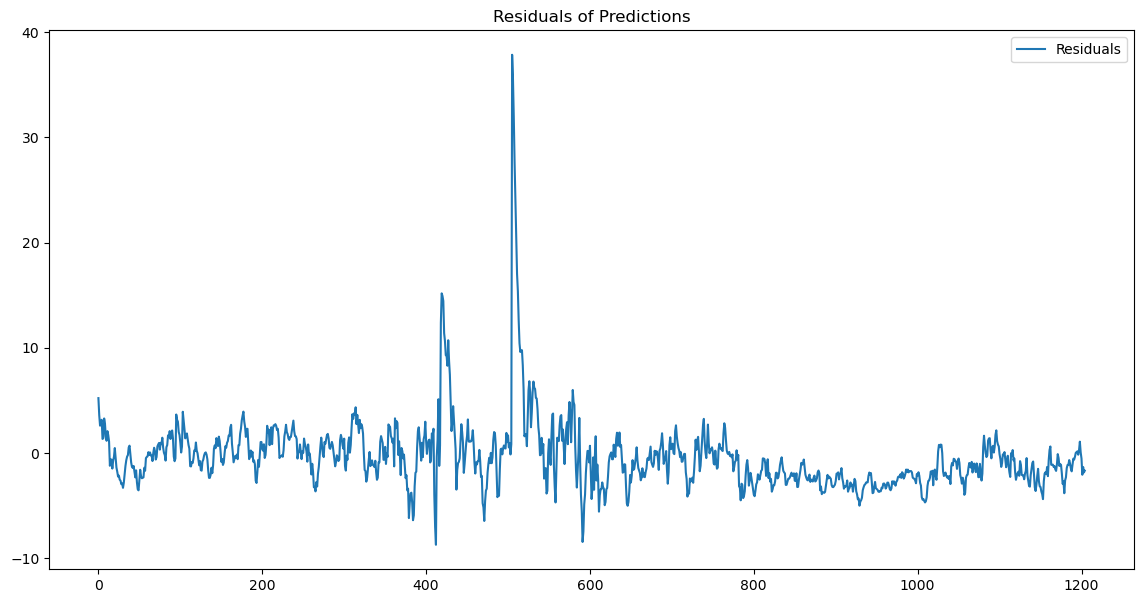

Mean Squared Error: 11.65784740447998


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

residuals = actual_prices - predicted_prices
plt.figure(figsize=(14,7))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()
mse = mean_squared_error(actual_prices, predicted_prices)
print(f'Mean Squared Error: {mse}')

GRU(
  (gru): GRU(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)
Epoch 0/100, Loss: 0.4997830390930176
Epoch 10/100, Loss: 0.18229153752326965
Epoch 20/100, Loss: 0.08566997945308685
Epoch 30/100, Loss: 0.042627669870853424
Epoch 40/100, Loss: 0.016672102734446526
Epoch 50/100, Loss: 0.002730937208980322
Epoch 60/100, Loss: 0.003486630041152239
Epoch 70/100, Loss: 0.001291935215704143
Epoch 80/100, Loss: 0.0014740523183718324
Epoch 90/100, Loss: 0.0011860401136800647


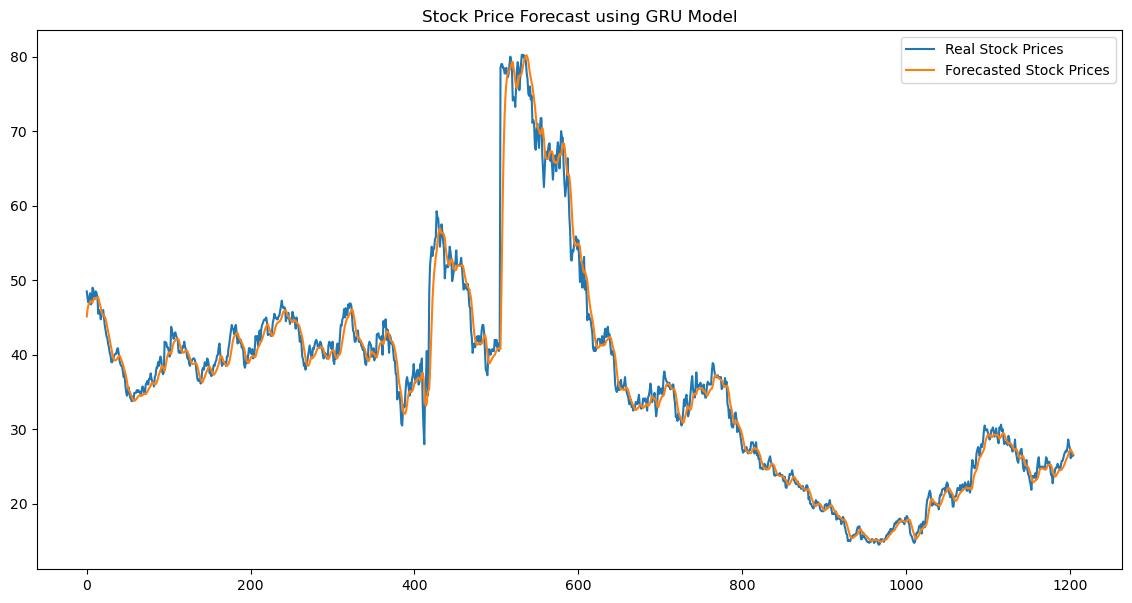

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the data from the CSV file
file_name = 'largeAAPL.csv'
stock_data = pd.read_csv(file_name)

# Normalize the data
normalization_range = (-1, 1)
data_normalizer = MinMaxScaler(feature_range=normalization_range)
close_column = stock_data['Close'].values.reshape(-1, 1)
normalized_data = data_normalizer.fit_transform(close_column)

# Function to create data sequences
def prepare_sequences(data, length_of_sequence):
    sequences, targets = [], []
    for i in range(len(data) - length_of_sequence):
        sequence = data[i:i + length_of_sequence]
        target = data[i + length_of_sequence]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Preparing sequences
seq_length = 60
x, y = prepare_sequences(normalized_data, seq_length)

# Splitting the data
split_percentage = 0.8
split_point = int(len(y) * split_percentage)
x_train, y_train = x[:split_point], y[:split_point]
x_test, y_test = x[split_point:], y[split_point:]

# Converting data into PyTorch Tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# GRU Neural Network Class
class GRU(nn.Module):
    def __init__(self, input_dimension=1, hidden_size=100, layers=1):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.layers = layers
        self.gru = nn.GRU(input_dimension, hidden_size, layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, seq):
        initial_hidden = torch.zeros(self.layers, seq.size(0), self.hidden_size).to(seq.device)
        gru_out, _ = self.gru(seq, initial_hidden)
        predictions = self.fc(gru_out[:, -1, :])
        return predictions

# Model initialization and setup
gru_model = GRU()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
print(gru_model)
# Training the model
epoch_count = 100
for epoch in range(epoch_count):
    gru_model.train()
    optimizer.zero_grad()
    predictions = gru_model(x_train)
    loss = loss_function(predictions, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{epoch_count}, Loss: {loss.item()}')

# Making predictions
gru_model.eval()
forecasted = gru_model(x_test)
forecasted = data_normalizer.inverse_transform(forecasted.detach().numpy())
real_values = data_normalizer.inverse_transform(y_test.detach().numpy())

# Visualization of results
plt.figure(figsize=(14, 7))
plt.plot(real_values, label='Real Stock Prices')
plt.plot(forecasted, label='Forecasted Stock Prices')
plt.title('Stock Price Forecast using GRU Model')
plt.legend()
plt.show()


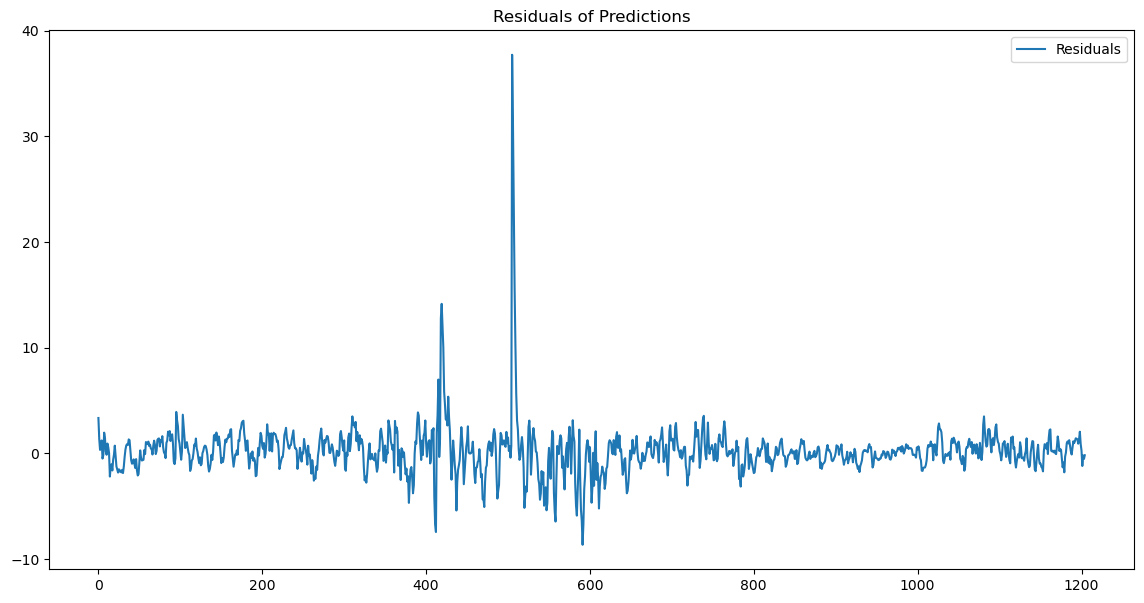

Mean Squared Error: 5.702489852905273


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

residuals = real_values - forecasted
plt.figure(figsize=(14,7))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()
mse = mean_squared_error(real_values, forecasted)
print(f'Mean Squared Error: {mse}')

RNN(
  (rnn): RNN(1, 100, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)
Epoch [0/100], Training Loss: 0.3705752193927765
Epoch [10/100], Training Loss: 0.07386112213134766
Epoch [20/100], Training Loss: 0.027065150439739227
Epoch [30/100], Training Loss: 0.005517690442502499
Epoch [40/100], Training Loss: 0.0012961820466443896
Epoch [50/100], Training Loss: 0.0015745897544547915
Epoch [60/100], Training Loss: 0.0012605661759153008
Epoch [70/100], Training Loss: 0.0010090748546645045
Epoch [80/100], Training Loss: 0.0009733180049806833
Epoch [90/100], Training Loss: 0.0009713097824715078


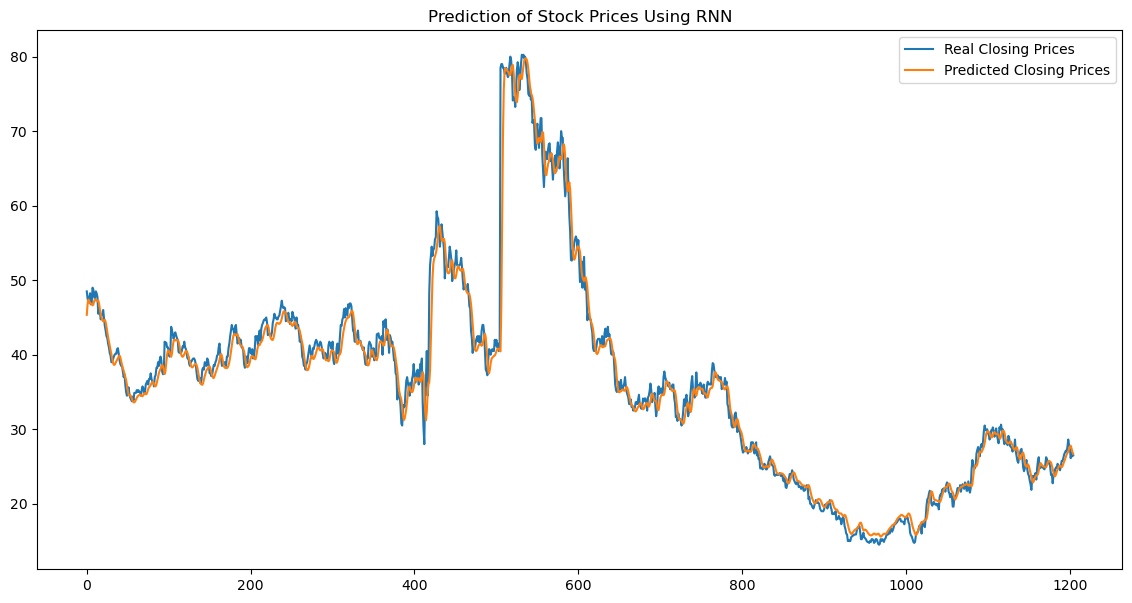

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# Data acquisition
data_path = 'largeAAPL.csv'
financial_data = pd.read_csv(data_path)

# Normalize the closing prices
normalizer = MinMaxScaler(feature_range=(-1, 1))
closing_prices = financial_data['Close'].values.reshape(-1, 1)
normalized_data = normalizer.fit_transform(closing_prices)

# Function to generate data sequences
def generate_sequences(input_data, seq_len):
    input_seqs, target_seqs = [], []
    for i in range(len(input_data) - seq_len):
        input_seq = input_data[i:i + seq_len]
        target_seq = input_data[i + seq_len]
        input_seqs.append(input_seq)
        target_seqs.append(target_seq)
    return np.array(input_seqs), np.array(target_seqs)

# Sequence preparation
seq_length = 60
x, y = generate_sequences(normalized_data, seq_length)

# Split data into training and testing sets
split_ratio = 0.8
train_split = int(len(y) * split_ratio)
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

# Convert data to tensors for PyTorch
x_train, y_train = torch.tensor(x_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
x_test, y_test = torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# RNN model class
class RNN(nn.Module):
    def __init__(self, input_dim=1, hidden_size=100, layer_count=1):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.layer_count = layer_count
        self.rnn = nn.RNN(input_dim, hidden_size, layer_count, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, sequence):
        initial_hidden = torch.zeros(self.layer_count, sequence.size(0), self.hidden_size).to(sequence.device)
        rnn_out, _ = self.rnn(sequence, initial_hidden)
        final_output = self.fc(rnn_out[:, -1, :])
        return final_output

# Model initialization, loss function, and optimizer setup
rnn_model = RNN()
loss_metric = nn.MSELoss()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
print(rnn_model)
# Model training loop
total_epochs = 100
for epoch in range(total_epochs):
    rnn_model.train()
    optimizer.zero_grad()
    model_output = rnn_model(x_train)
    training_loss = loss_metric(model_output, y_train)
    training_loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{total_epochs}], Training Loss: {training_loss.item()}')

# Model evaluation for predictions
rnn_model.eval()
predictions = rnn_model(x_test)
predictions = normalizer.inverse_transform(predictions.detach().numpy())
real_values = normalizer.inverse_transform(y_test.detach().numpy())

# Plotting the forecast results
plt.figure(figsize=(14, 7))
plt.plot(real_values, label='Real Closing Prices')
plt.plot(predictions, label='Predicted Closing Prices')
plt.title('Prediction of Stock Prices Using RNN')
plt.legend()
plt.show()


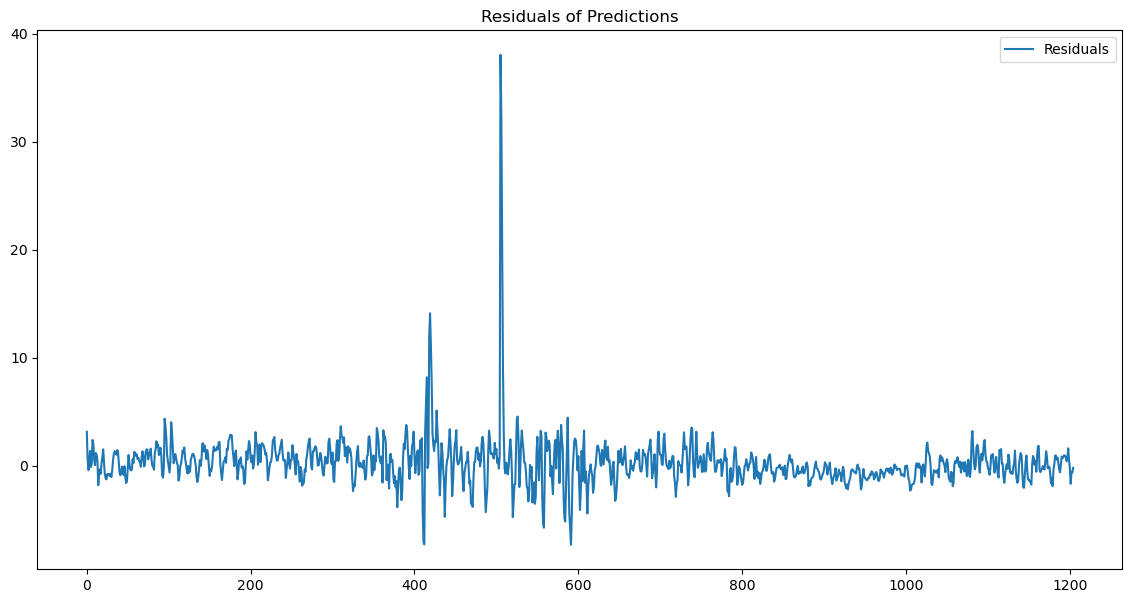

Mean Squared Error: 5.184683799743652


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

residuals = real_values - predictions
plt.figure(figsize=(14,7))
plt.plot(residuals, label='Residuals')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()
mse = mean_squared_error(real_values, predictions)
print(f'Mean Squared Error: {mse}')

In [8]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from torch.utils.data import DataLoader, TensorDataset

# Load the dataset
data = pd.read_csv('AAPL.csv')
close_prices = data['Close'].values.reshape(-1, 1)

# Data preprocessing
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_close = scaler.fit_transform(close_prices)

# Create sequences for the GRU model
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 120
x, y = create_sequences(scaled_close, sequence_length)

# Split the data into training and testing sets
train_size = int(len(y) * 0.8)
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the GRU Model
class GRU(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, num_layers=1):
        super(GRU, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_layer_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_layer_size).to(x.device)
        output, hidden = self.gru(x, h_0)
        output = self.linear(output[:, -1, :])
        return output

# Initialize the model, define the loss function and the optimizer
model = GRU()

# Define hyperparameters for grid search
param_grid = {
    'hidden_layer_size': [50, 100],
    'num_layers': [1, 2],
    'learning_rate': [0.001, 0.01]
}

# Prepare data loaders
train_data = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Grid Search
best_loss = float('inf')
best_params = {}
grid = ParameterGrid(param_grid)

for params in grid:
    model = GRU(input_size=1, hidden_layer_size=params['hidden_layer_size'], num_layers=params['num_layers'])
    optimizer = torch.optim.Adam(model.parameters(), lr=params['learning_rate'])
    criterion = nn.MSELoss()
    
    # Train the model
    num_epochs = 10  
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        predictions = model(x_test_tensor)
        loss = criterion(predictions, y_test_tensor)
        print(f"Params: {params}, Loss: {loss.item()}")
        
        # Save the model if it has a better loss
        if loss < best_loss:
            best_loss = loss
            best_params = params

# Output the best parameters
print(f"Best Parameters: {best_params}")




Params: {'hidden_layer_size': 50, 'learning_rate': 0.001, 'num_layers': 1}, Loss: 0.08822199702262878
Params: {'hidden_layer_size': 50, 'learning_rate': 0.001, 'num_layers': 2}, Loss: 0.013658168725669384
Params: {'hidden_layer_size': 50, 'learning_rate': 0.01, 'num_layers': 1}, Loss: 0.010303766466677189
Params: {'hidden_layer_size': 50, 'learning_rate': 0.01, 'num_layers': 2}, Loss: 0.02625342831015587
Params: {'hidden_layer_size': 100, 'learning_rate': 0.001, 'num_layers': 1}, Loss: 0.10456499457359314
Params: {'hidden_layer_size': 100, 'learning_rate': 0.001, 'num_layers': 2}, Loss: 0.006843192037194967
Params: {'hidden_layer_size': 100, 'learning_rate': 0.01, 'num_layers': 1}, Loss: 0.0062253642827272415
Params: {'hidden_layer_size': 100, 'learning_rate': 0.01, 'num_layers': 2}, Loss: 0.012301100417971611
Best Parameters: {'hidden_layer_size': 100, 'learning_rate': 0.01, 'num_layers': 1}


In [10]:
best_model = GRU(input_size=1, hidden_layer_size=best_params['hidden_layer_size'], num_layers=best_params['num_layers'])
optimizer = torch.optim.Adam(best_model.parameters(), lr=best_params['learning_rate'])
criterion = nn.MSELoss()
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Train the best model
num_epochs = 100
for epoch in range(num_epochs):
    best_model.train()
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = best_model(x_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

    # Optional: Print out the training loss
    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')

# 使用最佳模型进行预测
best_model.eval()
with torch.no_grad():
    predictions = best_model(x_test_tensor)
    predicted = scaler.inverse_transform(predictions.detach().numpy())
    actual = scaler.inverse_transform(y_test_tensor.detach().numpy())

# 计算MSE
mse = mean_squared_error(actual, predicted)
print(f'Mean Squared Error: {mse}')

Epoch 0 Loss: 0.009065770544111729
Epoch 10 Loss: 2.055154982372187e-05
Epoch 20 Loss: 1.0457561074872501e-05
Epoch 30 Loss: 5.0637099775485694e-05
Epoch 40 Loss: 8.812003216007724e-06
Epoch 50 Loss: 0.00010950722207780927
Epoch 60 Loss: 7.988450306584127e-06
Epoch 70 Loss: 2.2365897166309878e-05
Epoch 80 Loss: 0.00013082304212730378
Epoch 90 Loss: 5.235955995885888e-06
Mean Squared Error: 2.68230879007208
